In [1]:
import sys
import os 

import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# import lightgbm
# import xgboost
# import pandasql



sys.path.append('..')

In [2]:
from  src import config

In [3]:
df = pd.read_csv(config.TRAIN_KFOLDS_FILE)
df = df.drop('id',axis=1)

In [4]:
train_df = df.drop(config.TARGET_NAME, axis=1).drop('policyCode', axis=1).assign(dti=lambda df: df.dti.astype(np.float64))
test_df = pd.read_csv(config.TEST_FILE).drop('id', axis=1).drop('policyCode', axis=1).assign(dti=lambda df: df.dti.astype(np.float64))

In [5]:
target = df.isDefault.values

In [6]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loanAmnt,800000.0,14416.818875,8716.086178,500.00,8000.00,12000.000,20000.00,40000.00
term,800000.0,3.482745,0.855832,3.00,3.00,3.000,3.00,5.00
interestRate,800000.0,13.238391,4.765757,5.31,9.75,12.740,15.99,30.99
installment,800000.0,437.947723,261.460393,15.69,248.45,375.135,580.71,1715.42
employmentTitle,799999.0,72005.351714,106585.640204,0.00,427.00,7755.000,117663.50,378351.00
homeOwnership,800000.0,0.614213,0.675749,0.00,0.00,1.000,1.00,5.00
annualIncome,800000.0,76133.910493,68947.513672,0.00,45600.00,65000.000,90000.00,10999200.00
verificationStatus,800000.0,1.009683,0.782716,0.00,0.00,1.000,2.00,2.00
purpose,800000.0,1.745982,2.367453,0.00,0.00,0.000,4.00,13.00
postCode,799999.0,258.535648,200.037446,0.00,103.00,203.000,395.00,940.00


In [7]:
# 缺失值情况
pd.concat([train_df.isnull().sum()/train_df.shape[0],test_df.isnull().sum()/test_df.shape[0]], axis=1)

,0,1
loanAmnt,0.000000,0.000000
term,0.000000,0.000000
interestRate,0.000000,0.000000
installment,0.000000,0.000000
grade,0.000000,0.000000
subGrade,0.000000,0.000000
employmentTitle,0.000001,0.000000
employmentLength,0.058499,0.058710
homeOwnership,0.000000,0.000000
annualIncome,0.000000,0.000000


In [8]:
train_df['flag'] = 'train'
test_df['flag'] = 'test'
total_df = pd.concat([train_df, test_df])

In [9]:
cols = list(filter(lambda x: x not in set(['kfold', 'flag']),total_df.columns))

In [10]:
#缺失值分布
total_df.groupby(['flag']).apply(lambda x: x.isnull().sum()/x.shape[0]).transpose()

flag,test,train
loanAmnt,0.000000,0.000000
term,0.000000,0.000000
interestRate,0.000000,0.000000
installment,0.000000,0.000000
grade,0.000000,0.000000
subGrade,0.000000,0.000000
employmentTitle,0.000000,0.000001
employmentLength,0.058710,0.058499
homeOwnership,0.000000,0.000000
annualIncome,0.000000,0.000000


In [11]:
# 填充缺失值策略
# 类别型特征填充为 NAN  离散计数行特征 填充为最小值  连续型特征填充为均值
for feature in cols:
    if feature in config.CATEGORY_FEATURE_MAP.keys():
        total_df[feature] = total_df[feature].fillna('NAN')
    elif feature in config.CONTINUE_FEATURE_MAP.keys():
        total_df[feature] = total_df[feature].fillna('mean')
    elif feature in config.DISCRETE_FEATURE_MAP.keys():
        total_df[feature] = total_df[feature].fillna('min')
    else:
        print(f"{feature} not exists!")

================grade:贷款等级================


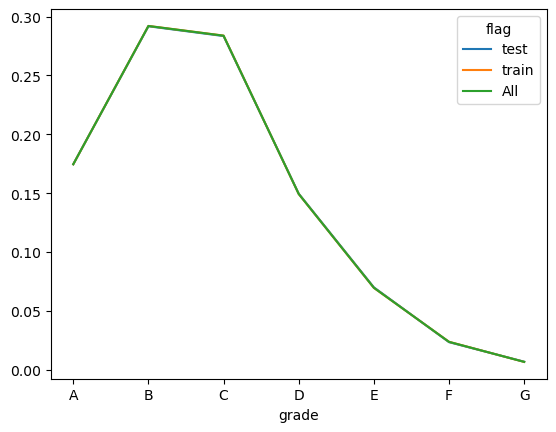

================subGrade:贷款等级之子级================


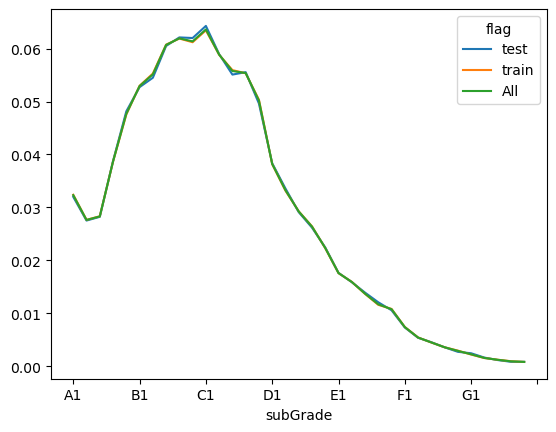

================employmentTitle:就业职称================


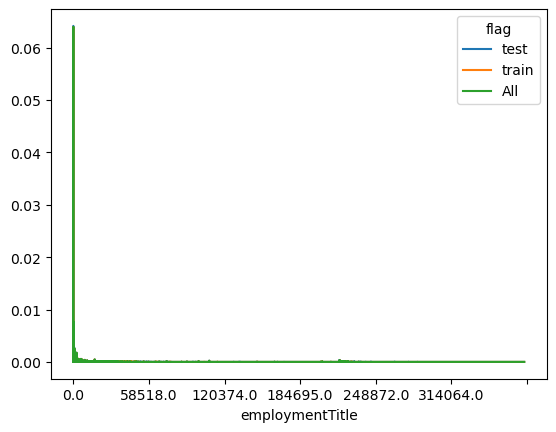

================employmentLength:就业年限（年）================


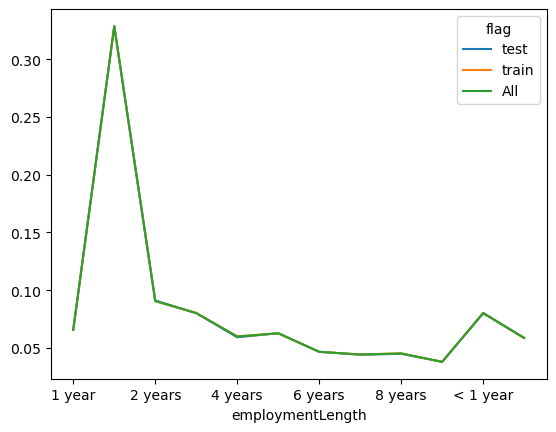

================homeOwnership:借款人在登记时提供的房屋所有权状况================


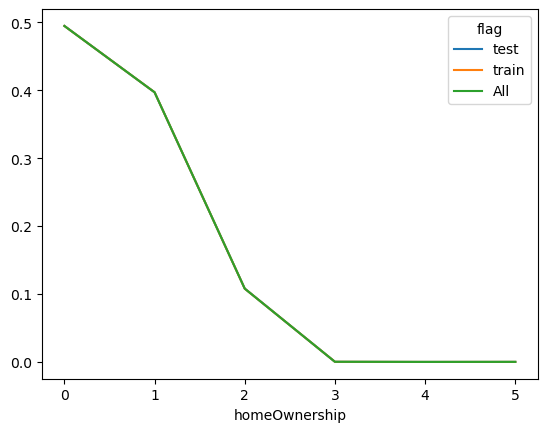

================verificationStatus:验证状态================


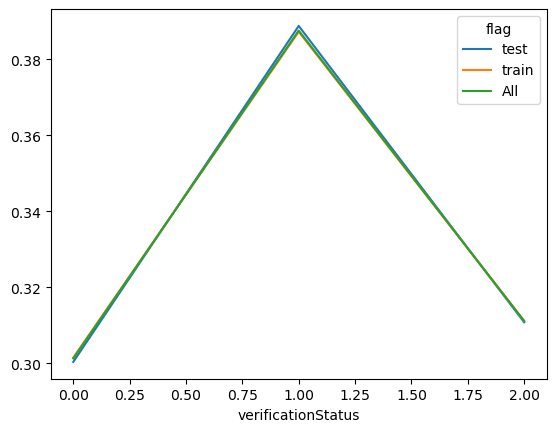

================issueDate:贷款发放的月份================


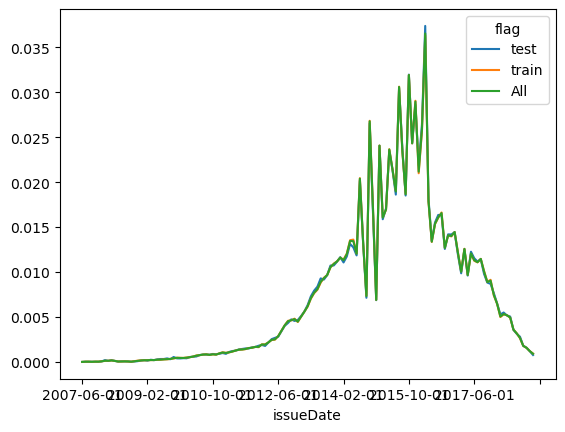

================purpose:借款人在贷款申请时的贷款用途类别================


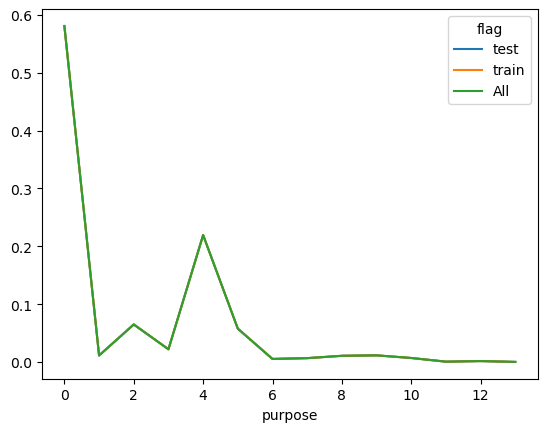

================postCode:借款人在贷款申请中提供的邮政编码的前3位数字================


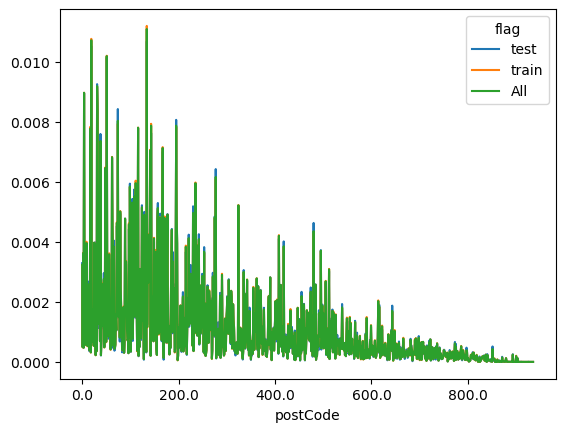

================regionCode:地区编码================


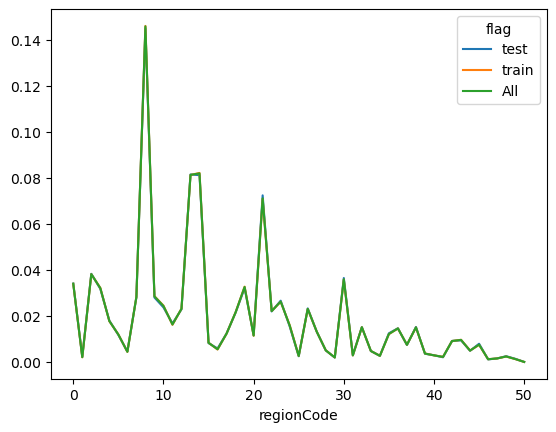

================initialListStatus:贷款的初始列表状态================


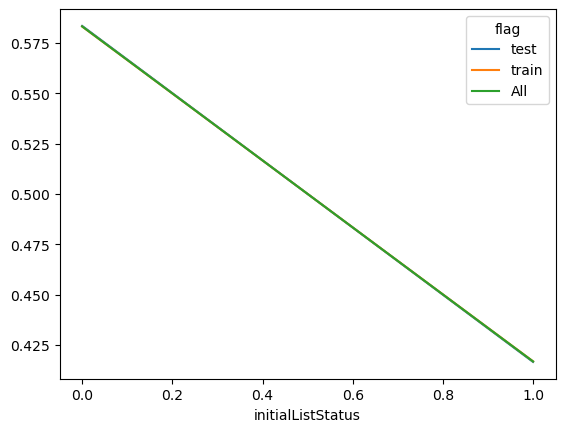

================applicationType:表明贷款是个人申请还是与两个共同借款人的联合申请================


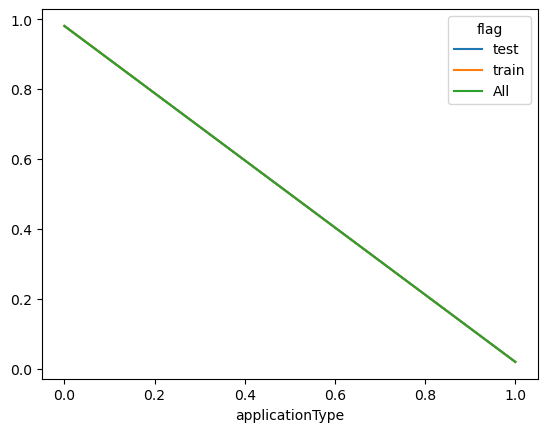

================earliesCreditLine:借款人最早报告的信用额度开立的月份================


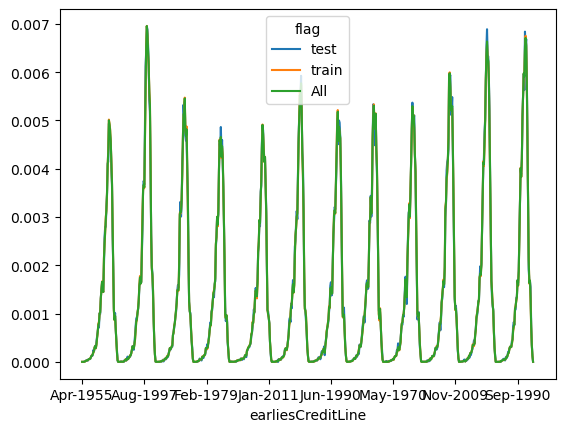

================title:借款人提供的贷款名称================


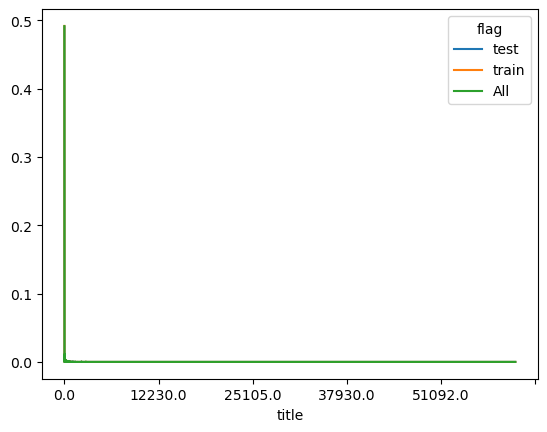

In [12]:
# 各个特征在训练集和测试集的分布是否相近
# 类别型特征
for feature in config.CATEGORY_FEATURE_MAP.keys():
    print(f"================{feature}:{config.CATEGORY_FEATURE_MAP[feature]}================")
    pd.crosstab(index=total_df[feature], columns=total_df['flag'], values=total_df.reset_index()['index'],aggfunc=len, margins=True,normalize='columns' ).plot()
    plt.show()

==============loanAmnt:贷款金额================


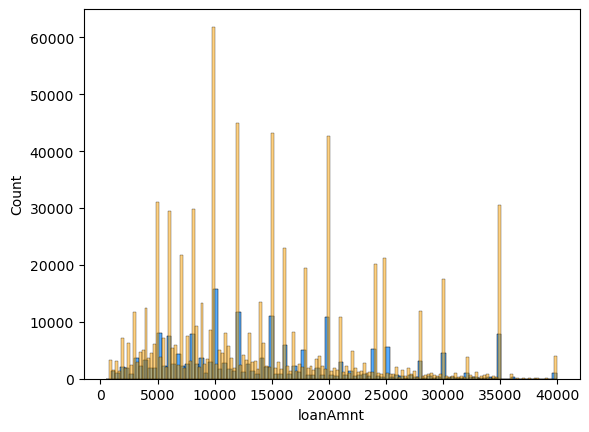

==============interestRate:贷款利率================


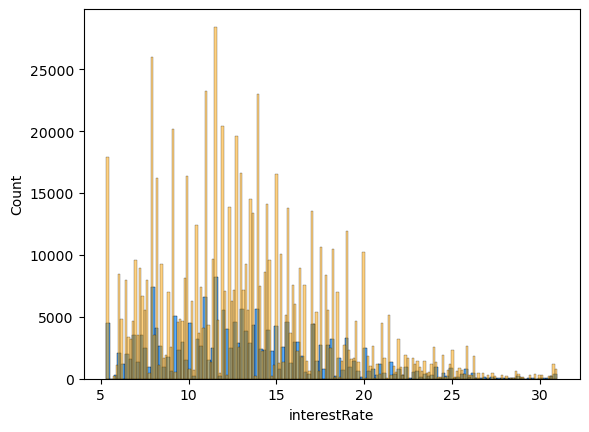

==============installment:分期付款金额================


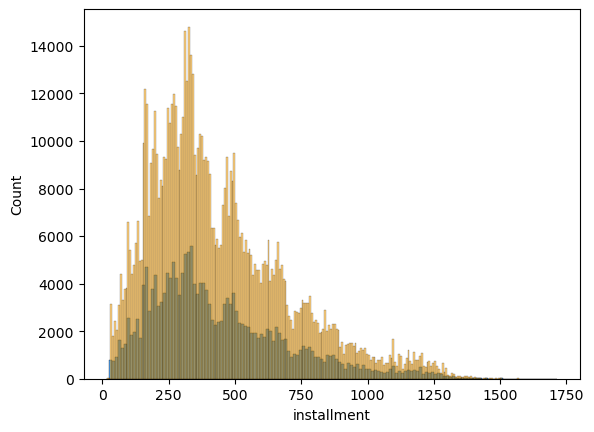

==============annualIncome:年收入================


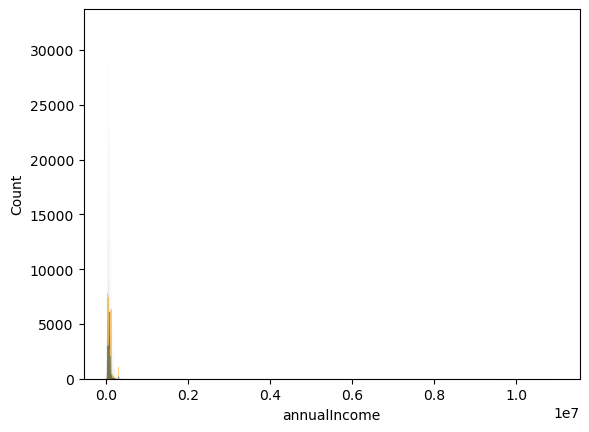

==============revolBal:信贷周转余额合计================


In [ ]:
# 连续型特征
for feature in config.CONTINUE_FEATURE_MAP.keys():
    if feature == 'dti':continue
    print(f"=============={feature}:{config.CONTINUE_FEATURE_MAP[feature]}================")
    ax = plt.subplot()
    sns.histplot(total_df.query('flag=="test"'),x=feature, color='dodgerblue',label='test', ax=ax)
    sns.histplot(total_df.query('flag=="train"'),x=feature, color='orange', label='train', ax=ax, alpha=0.5)
    plt.show()

In [ ]:
#计数型特征
for feature, name in config.DISCRETE_FEATURE_MAP.items():
    print(f"""================={feature}:{name}===================""")
    pd.crosstab(index=total_df[feature], columns=total_df['flag'], values=total_df.reset_index()['index'],aggfunc=len, margins=True,normalize='columns' ).plot()
    plt.show()

- **训练集与测试集分布一致**
- **类别型特征**
- employmentTitle、postCode、title是高维稀疏特征
- applicationType是类别不平衡的特征
- **连续型特征**
- annualIncome、annualIncome存在明显长尾分布
- **离散型特征**
- delinquency_2years、pubRec、pubRecBankruptcies、n0、n11、n12、n13长尾分布

In [ ]:
# 违约率与单变量关系
for feature, name in config.CATEGORY_FEATURE_MAP.items():
    print(f'=================={feature}:{name}==========================')
    sns.countplot(train_df.assign(target=target),  x=feature, hue=target) 
    plt.show()

In [ ]:
sns.countplot?

In [ ]:
'''
Author: jinta jintangz@126.com
Date: 2023-03-19 13:56:23
LastEditors: jinta jintangz@126.com
LastEditTime: 2023-11-11 09:57:56
FilePath: \ML_learning\notebooks\Untitled.ipynb
Description: 
Version: 
Copyright: kimzhao supported
'''

